# pandas数据统计函数

1. 汇总类统计
2. 唯一去重和按值计算
3. 相关系数和协方差

In [1]:
import pandas as pd

file_path = './data/beijing_tianqi/beijing_tianqi_2018.csv'
df = pd.read_csv(file_path)
df

,ymd,bWendu,yWendu,tianqi,fengxiang,fengli,aqi,aqiInfo,aqiLevel
0,2018-01-01,3℃,-6℃,晴~多云,东北风,1-2级,59,良,2
1,2018-01-02,2℃,-5℃,阴~多云,东北风,1-2级,49,优,1
2,2018-01-03,2℃,-5℃,多云,北风,1-2级,28,优,1
3,2018-01-04,0℃,-8℃,阴,东北风,1-2级,28,优,1
4,2018-01-05,3℃,-6℃,多云~晴,西北风,1-2级,50,优,1
...,...,...,...,...,...,...,...,...,...
360,2018-12-27,-5℃,-12℃,多云~晴,西北风,3级,48,优,1
361,2018-12-28,-3℃,-11℃,晴,西北风,3级,40,优,1
362,2018-12-29,-3℃,-12℃,晴,西北风,2级,29,优,1
363,2018-12-30,-2℃,-11℃,晴~多云,东北风,1级,31,优,1


In [2]:
df.loc[:, 'bWendu'] = df['bWendu'].str.replace('℃', '').astype('int32')
df.loc[:, 'yWendu'] = df['yWendu'].str.replace('℃', '').astype('int32')
df

,ymd,bWendu,yWendu,tianqi,fengxiang,fengli,aqi,aqiInfo,aqiLevel
0,2018-01-01,3,-6,晴~多云,东北风,1-2级,59,良,2
1,2018-01-02,2,-5,阴~多云,东北风,1-2级,49,优,1
2,2018-01-03,2,-5,多云,北风,1-2级,28,优,1
3,2018-01-04,0,-8,阴,东北风,1-2级,28,优,1
4,2018-01-05,3,-6,多云~晴,西北风,1-2级,50,优,1
...,...,...,...,...,...,...,...,...,...
360,2018-12-27,-5,-12,多云~晴,西北风,3级,48,优,1
361,2018-12-28,-3,-11,晴,西北风,3级,40,优,1
362,2018-12-29,-3,-12,晴,西北风,2级,29,优,1
363,2018-12-30,-2,-11,晴~多云,东北风,1级,31,优,1


## 汇总类统计


In [4]:
# 提取所有数字统计结果
df.describe()

,aqi,aqiLevel
count,365.000000,365.000000
mean,82.183562,2.090411
std,51.936159,1.029798
min,21.000000,1.000000
25%,46.000000,1.000000
50%,69.000000,2.000000
75%,104.000000,3.000000
max,387.000000,6.000000


In [6]:
# 查看单个Series的数据

# 平均值
df['bWendu'].mean()

18.665753424657535

In [7]:
# 最高温
df['bWendu'].max()

38

In [8]:
# 最低温
df['bWendu'].min()

-5

## 唯一去重和按值计数

### 唯一性去重
一般不用于数值列，而是枚举、分类列

In [9]:
df['fengxiang'].unique()

array(['东北风', '北风', '西北风', '西南风', '南风', '东南风', '东风', '西风'], dtype=object)

In [10]:
df['fengli'].unique()

array(['1-2级', '4-5级', '3-4级', '2级', '1级', '3级'], dtype=object)

In [11]:
df['tianqi'].unique()

array(['晴~多云', '阴~多云', '多云', '阴', '多云~晴', '多云~阴', '晴', '阴~小雪', '小雪~多云',
       '小雨~阴', '小雨~雨夹雪', '多云~小雨', '小雨~多云', '大雨~小雨', '小雨', '阴~小雨',
       '多云~雷阵雨', '雷阵雨~多云', '阴~雷阵雨', '雷阵雨', '雷阵雨~大雨', '中雨~雷阵雨', '小雨~大雨',
       '暴雨~雷阵雨', '雷阵雨~中雨', '小雨~雷阵雨', '雷阵雨~阴', '中雨~小雨', '小雨~中雨', '雾~多云',
       '霾'], dtype=object)

### 按值计数

In [12]:
df['fengxiang'].value_counts()

fengxiang
南风     92
西南风    64
北风     54
西北风    51
东南风    46
东北风    38
东风     14
西风      6
Name: count, dtype: int64

In [13]:
df['fengli'].value_counts()

fengli
1-2级    236
3-4级     68
1级       21
4-5级     20
2级       13
3级        7
Name: count, dtype: int64

In [14]:
df['tianqi'].value_counts()

tianqi
晴         101
多云         95
多云~晴       40
晴~多云       34
多云~雷阵雨     14
多云~阴       10
雷阵雨         8
小雨~多云       8
阴~多云        8
雷阵雨~多云      7
小雨          6
多云~小雨       5
阴           4
雷阵雨~中雨      4
中雨~小雨       2
中雨~雷阵雨      2
阴~小雨        2
霾           2
大雨~小雨       1
阴~雷阵雨       1
小雨~雨夹雪      1
雷阵雨~大雨      1
小雨~阴        1
小雨~大雨       1
暴雨~雷阵雨      1
小雪~多云       1
小雨~雷阵雨      1
雷阵雨~阴       1
阴~小雪        1
小雨~中雨       1
雾~多云        1
Name: count, dtype: int64

## 相关系数和协方差
用途：（非常牛逼）  
1. 两只股票，是不是同跌同涨？程度多大？正相关还是负相关？
2. 产品销量的波动，跟哪些因素正相关、负相关，程度有多大？abs

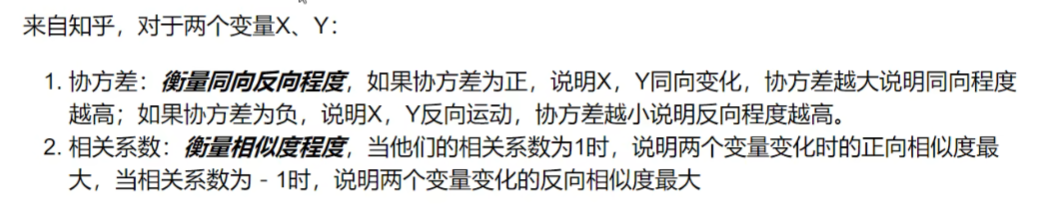

In [18]:
df

,ymd,bWendu,yWendu,tianqi,fengxiang,fengli,aqi,aqiInfo,aqiLevel
0,2018-01-01,3,-6,晴~多云,东北风,1-2级,59,良,2
1,2018-01-02,2,-5,阴~多云,东北风,1-2级,49,优,1
2,2018-01-03,2,-5,多云,北风,1-2级,28,优,1
3,2018-01-04,0,-8,阴,东北风,1-2级,28,优,1
4,2018-01-05,3,-6,多云~晴,西北风,1-2级,50,优,1
...,...,...,...,...,...,...,...,...,...
360,2018-12-27,-5,-12,多云~晴,西北风,3级,48,优,1
361,2018-12-28,-3,-11,晴,西北风,3级,40,优,1
362,2018-12-29,-3,-12,晴,西北风,2级,29,优,1
363,2018-12-30,-2,-11,晴~多云,东北风,1级,31,优,1


In [19]:
# 协方差矩阵
df[['bWendu', 'yWendu', 'aqi', 'aqiLevel']].cov()

,bWendu,yWendu,aqi,aqiLevel
bWendu,140.613247,135.529633,47.462622,0.879204
yWendu,135.529633,138.181274,16.186685,0.264165
aqi,47.462622,16.186685,2697.364564,50.749842
aqiLevel,0.879204,0.264165,50.749842,1.060485


In [20]:
# 相关系数矩阵
df[['bWendu', 'yWendu', 'aqi', 'aqiLevel']].corr()

,bWendu,yWendu,aqi,aqiLevel
bWendu,1.000000,0.972292,0.077067,0.071999
yWendu,0.972292,1.000000,0.026513,0.021822
aqi,0.077067,0.026513,1.000000,0.948883
aqiLevel,0.071999,0.021822,0.948883,1.000000


In [21]:
# 单独查看空气质量和最高温度的相关系数
df['aqi'].corr(df['bWendu'])

0.07706705916811069

In [22]:
df['aqi'].corr(df['yWendu'])

0.02651328267296889

In [23]:
# 空气质量和温差的相关系数
df['aqi'].corr(df['bWendu']-df['yWendu'])

0.2165225757638205